In [1]:
import glob
import os
import pathlib
import cv2
import numpy as np
import logging
from ultralytics import YOLO, SAM
from ultralytics.engine.results import Results, Boxes
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# logging.basicConfig(
#     level=logging.DEBUG,
#     format="%(levelname)s:%(name)s:%(message)s")

asset_folder = "assets"

manga_folder = f"{asset_folder}/manga"
clean_folder = f"{asset_folder}/manga_clean_test"

# file_list = glob.glob(f"{manga_folder}/*.jpg")
file_list = ["oncepiece.png"]

boxer = YOLO("models/manga_boxer.pt")
sam = SAM("models/mobile_sam.pt")

In [3]:
result = boxer.predict(file_list)[0]


0: 640x448 14 bubbles, 55.3ms
Speed: 5.5ms preprocess, 55.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 448)


In [4]:
sam_result = sam.predict(file_list[0], bboxes=result.boxes.xyxy)[0]

libpng warning: iCCP: known incorrect sRGB profile


image 1/1 /Users/lawansiri/Projects/yolo101/oncepiece.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1324.5ms
Speed: 9.7ms preprocess, 1324.5ms inference, 31.6ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
sam_result.save("oncepiece_sam.jpg")

'oncepiece_sam.jpg'

In [5]:
len(sam_result.masks)

12

In [6]:
mask_numpy_list = sam_result.masks.data.cpu().numpy()

In [7]:
img = cv2.imread(file_list[0])

libpng warning: iCCP: known incorrect sRGB profile


In [10]:
img_sam = cv2.imread("oncepiece_sam.jpg")
img_sam_rgb = cv2.cvtColor(img_sam, cv2.COLOR_BGR2RGB)

In [8]:
mask_numpy_list[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(1818, 1280))

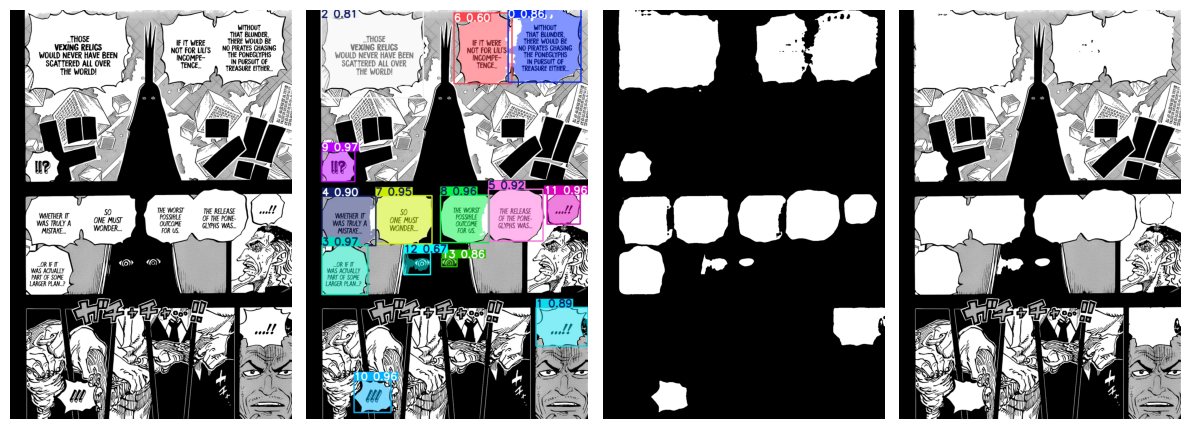

In [11]:

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blue_overlay = np.zeros_like(image_rgb, dtype=np.uint8)  

for mask in mask_numpy_list:

    # reduce mask size because sometime it remove bubble line
    mask = np.where(mask, 1, 0).astype(np.uint8)  # Convert mask to uint8
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=1)
    # set mask area to white color
    blue_overlay[mask == 1] = [255, 255, 255]   
    
# alpha = 0.7  # Transparency level for the overlay
weighted = cv2.addWeighted(image_rgb, 1, blue_overlay, 1, 0)

cv2.imwrite("test.png", cv2.cvtColor(weighted, cv2.COLOR_RGB2BGR))

fig, axes = plt.subplots(1, 4, figsize=(12,12))

axes[0].imshow(image_rgb)
axes[0].axis('off')
axes[1].imshow(img_sam_rgb)
axes[1].axis('off')
axes[2].imshow(blue_overlay)
axes[2].axis('off')
axes[3].imshow(weighted)
axes[3].axis('off')
plt.tight_layout()
plt.show()

In [15]:
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(1818, 1280), dtype=uint8)